# Analyzing Data

Here, we will analyze the data that was ingested and cleaned by another script.  We will visually explore the data, try to draw conclusions, and explain our findings.

First, let's bring in the cleaned, prepared data.  Since it was saved as a .csv, we'll have to reconvert a few things (dates to datetime, for example).

In [1]:
import pandas as pd
potholes = pd.read_csv('../data/cleaned_311_pothole_data.csv')

In [2]:
potholes.head()

,created_date,complaint_type,incident_zip,cross_street_1,cross_street_2,address_type,city,status,community_board,borough,open_data_channel_type,park_borough,latitude,longitude,resolved_date,days_to_close,shorter_description
0,2016-11-01 15:01:46,Street Condition,NaN,AVENUE M,AVENUE N,BLOCKFACE,NaN,Closed,Unspecified BROOKLYN,BROOKLYN,UNKNOWN,BROOKLYN,NaN,NaN,2016-11-02 09:45:00,1.0,Repaired: Inspected and Repaired
1,2019-04-01 22:22:27,Street Condition,10306.0,JACQUES AVENUE,NEW DORP LANE,ADDRESS,STATEN ISLAND,Closed,02 STATEN ISLAND,STATEN ISLAND,UNKNOWN,STATEN ISLAND,40.572961,-74.113157,2019-04-02 10:51:00,1.0,Not Repaired: Did Not Find
2,2013-01-09 11:20:10,Street Condition,NaN,DELANCEY STREET,WILLIAMSBURG BRIDGE,BLOCKFACE,NEW YORK,Closed,Unspecified MANHATTAN,MANHATTAN,UNKNOWN,MANHATTAN,NaN,NaN,2013-01-10 14:04:00,1.0,Repaired: Inspected and Repaired
3,2013-01-10 14:45:07,Street Condition,11101.0,40 AVENUE,41 AVENUE,BLOCKFACE,Long Island City,Closed,Unspecified QUEENS,QUEENS,UNKNOWN,QUEENS,NaN,NaN,2013-01-11 10:20:00,1.0,Repaired: Inspected and Repaired
4,2019-03-29 07:05:49,Street Condition,10025.0,WEST 105 STREET,WEST 106 STREET,ADDRESS,NEW YORK,Closed,07 MANHATTAN,MANHATTAN,UNKNOWN,MANHATTAN,40.798200,-73.961809,2019-03-30 20:00:00,1.0,Repaired: Inspected and Repaired


In [3]:
potholes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569322 entries, 0 to 569321
Data columns (total 17 columns):
created_date              569322 non-null object
complaint_type            569322 non-null object
incident_zip              525224 non-null float64
cross_street_1            462760 non-null object
cross_street_2            462695 non-null object
address_type              551676 non-null object
city                      528643 non-null object
status                    569322 non-null object
community_board           569322 non-null object
borough                   569322 non-null object
open_data_channel_type    569322 non-null object
park_borough              569322 non-null object
latitude                  521367 non-null float64
longitude                 521367 non-null float64
resolved_date             569129 non-null object
days_to_close             569129 non-null float64
shorter_description       569322 non-null object
dtypes: float64(4), object(13)
memory usage: 73.8+ M

In [4]:
for col in ['created_date', 'resolved_date']:
    potholes[col] = pd.to_datetime(potholes[col])

## Exploratory Data Visualization

Let's look around a bit at our data to give us additional insight.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

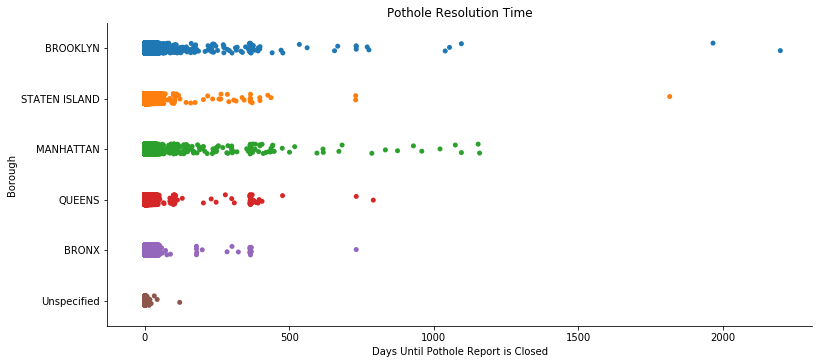

In [6]:
p=sns.catplot(x="days_to_close", y="borough", data=potholes)
p.fig.set_size_inches(15, 5)
plt.xlabel("Days Until Pothole Report is Closed")
plt.ylabel("Borough")
plt.title("Pothole Resolution Time")
plt.show()

It looks as though there are a few odd outliers for each borough, with more than 500 days for resolution.  But the bulk of the complaints were closed in a much shorter time. 

Is there a difference in the borough community boards?  Are some community board areas more prone to longer wait times for complaint resolution?  

Let's see, taking each borough in turn.  We'll do a boxplot, and omit any outliers that might make our visualization be too scaled out.

In [7]:
def plot_community_board(borough):
    ax = plt.subplots(figsize=(15, 10))
    medianprops = dict(linewidth=2, color='firebrick')
    sns.boxplot(x="days_to_close", 
                  y="community_board", 
                  data=potholes[potholes['borough'] == borough],
               showfliers=False,
               color = "LightGreen",
               linewidth=1,
               **{'medianprops':medianprops})
    plt.xlabel("Days Until Pothole Report is Closed")
    plt.ylabel("Community Board")
    plt.title("Pothole Resolution Time: " + borough)
    plt.show()

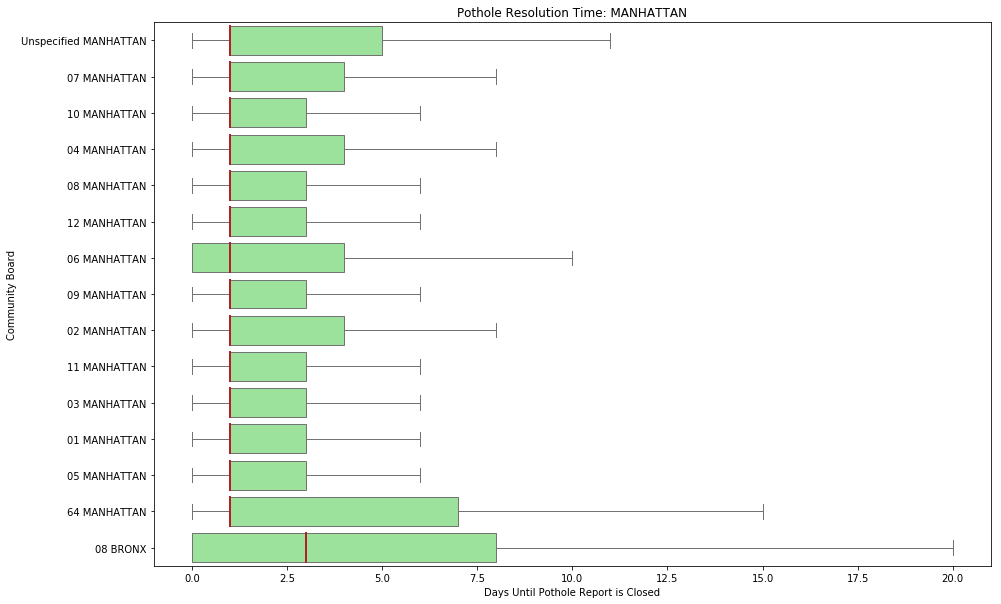

In [8]:
plot_community_board("MANHATTAN")

Well, the medians all seem pretty much the same -- except for that weird "Bronx" that slipped in somehow (maybe there's an overlap in community boards, and they cross borough boundaries).  What about the Bronx?

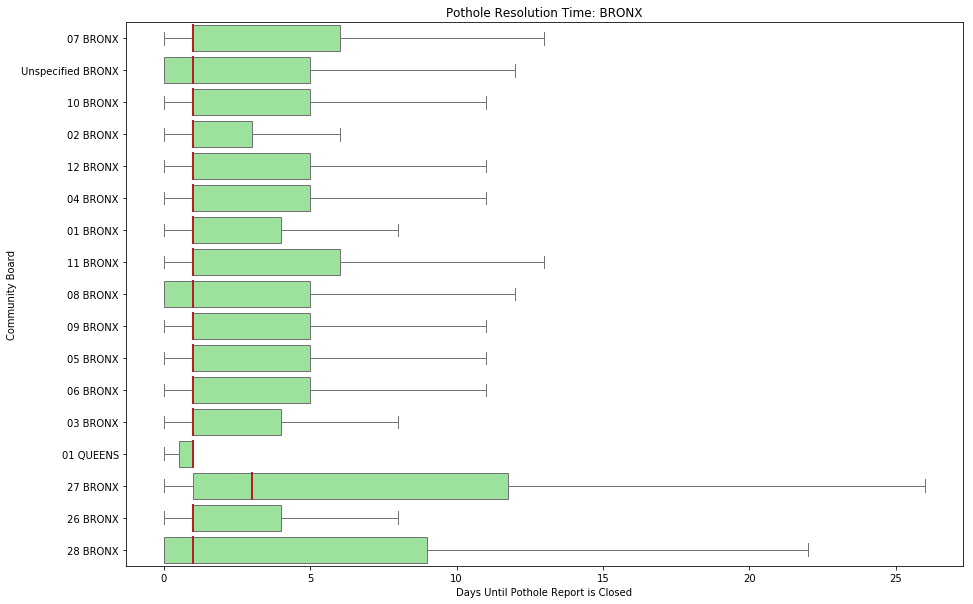

In [9]:
plot_community_board("BRONX")

Let's keep looking!

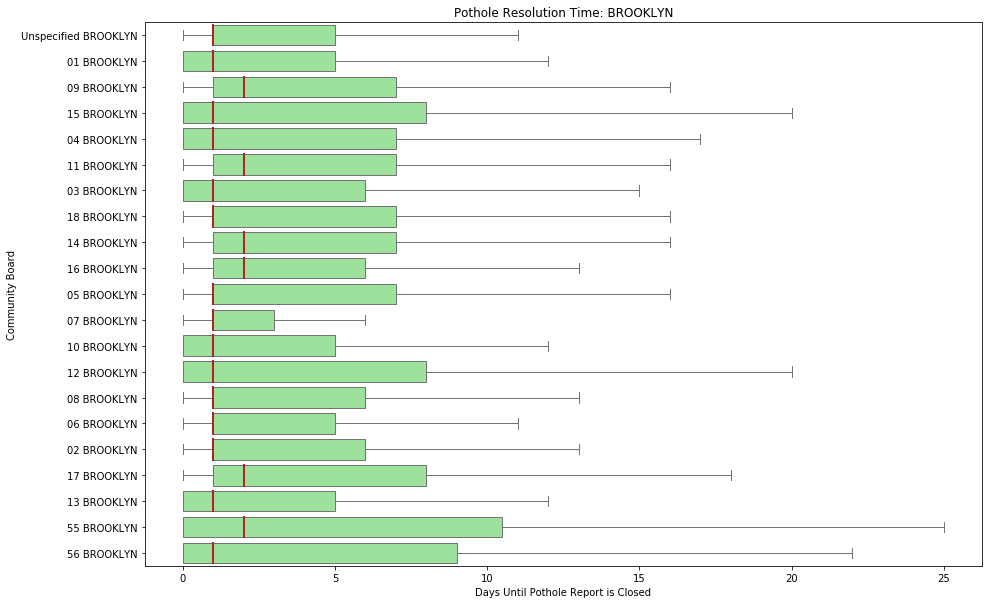

In [10]:
plot_community_board("BROOKLYN")

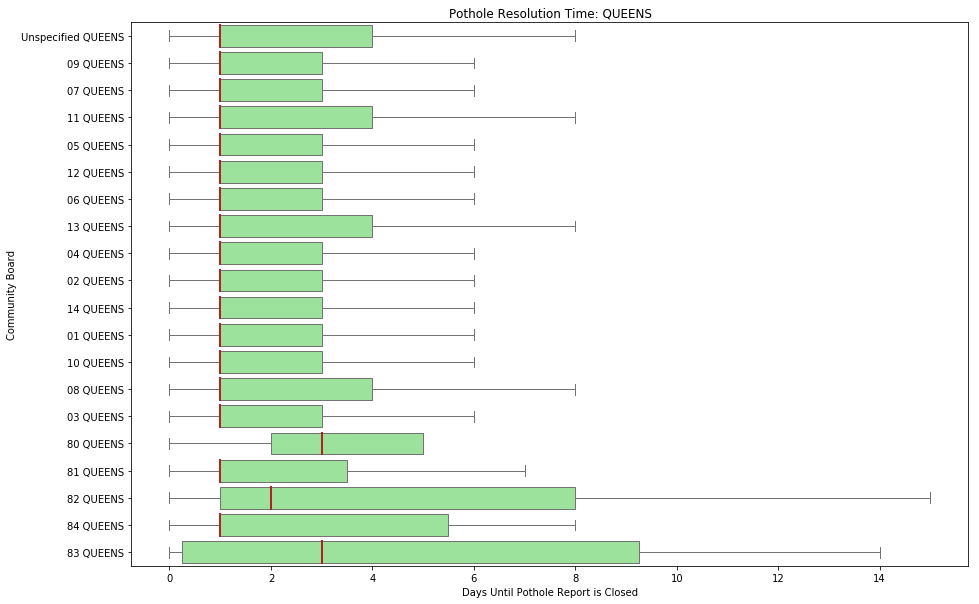

In [11]:
plot_community_board("QUEENS")

Hmmm... there are a couple of Queens community boards with noticably higher median response times.  Probably not worth a deeper analysis right now, but interesting.

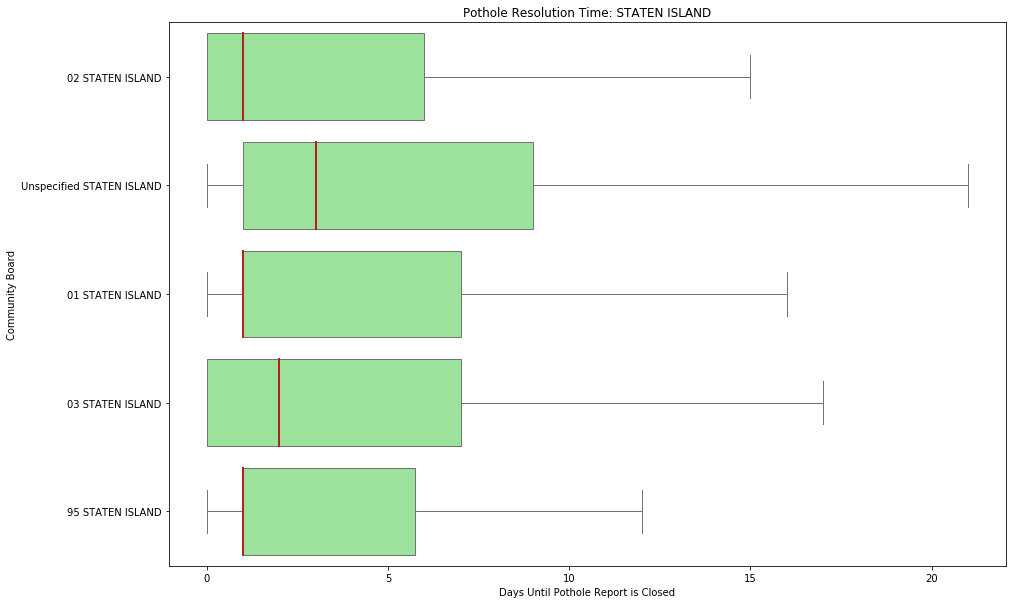

In [12]:
plot_community_board("STATEN ISLAND")

Let's see if we can do a heatmap to look at various resolution types.


In [13]:
borough_resolution = potholes.groupby(["borough", "shorter_description"]).size()

In [14]:
borough_resolution = borough_resolution.unstack(level = 0)
borough_resolution

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
shorter_description,,,,,,
Not Repaired: Did Not Find,1417.0,8765.0,5904.0,14982.0,3590.0,4.0
Not Repaired: Duplicate,6424.0,18934.0,6863.0,16129.0,11810.0,5.0
Not Repaired: Not in DOT Jurisdiction (Not Specified),8.0,48.0,8.0,35.0,NaN,5.0
Not Repaired: Unsufficient Information,NaN,1.0,NaN,NaN,2.0,1.0
Not Repaired: Was in Compliance,NaN,1.0,3.0,6.0,NaN,2.0
Other: Check Status,NaN,NaN,1.0,NaN,NaN,NaN
Other: No Description,44.0,167.0,169.0,125.0,31.0,NaN
Other: Status Not Available,127.0,27.0,16.0,34.0,20.0,NaN
Postponed: Future Maintenance Will Fix,79.0,466.0,382.0,188.0,NaN,156.0


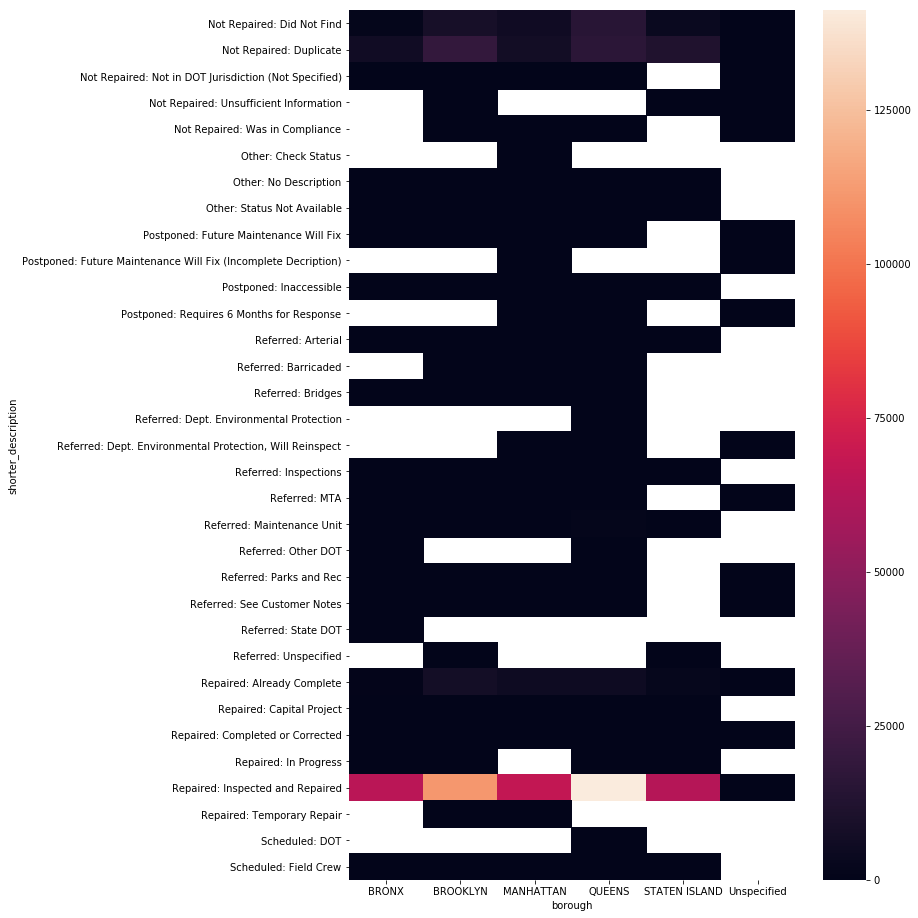

In [15]:
plt.figure(figsize=(10, 16))
sns.heatmap(borough_resolution)

That's not terribly surprising, and it's reassuring that most potholes get repaired!  Let's leave those out, however, and see the heatmap for categories other than "Repaired: Inspected and Repaired".

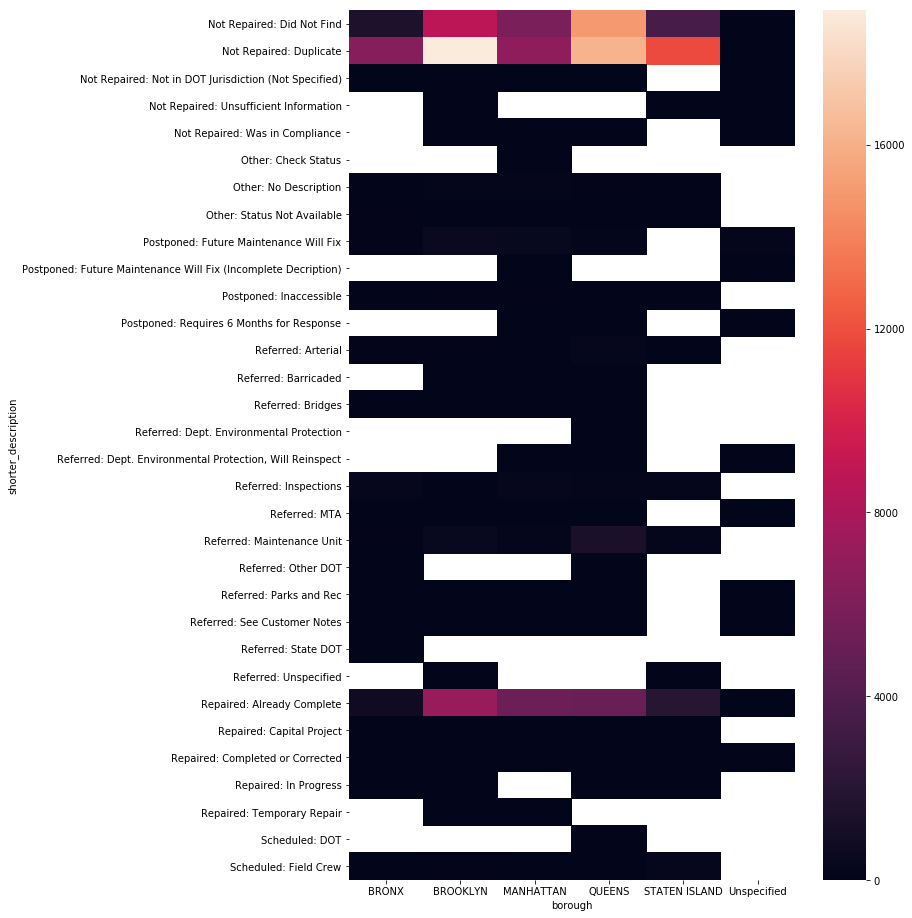

In [16]:
plt.figure(figsize=(10, 16))
sns.heatmap(borough_resolution.drop("Repaired: Inspected and Repaired"))

What about overall number of complaints by year?

In [17]:
import datetime as dt
potholes['year'] = potholes['created_date'].dt.year

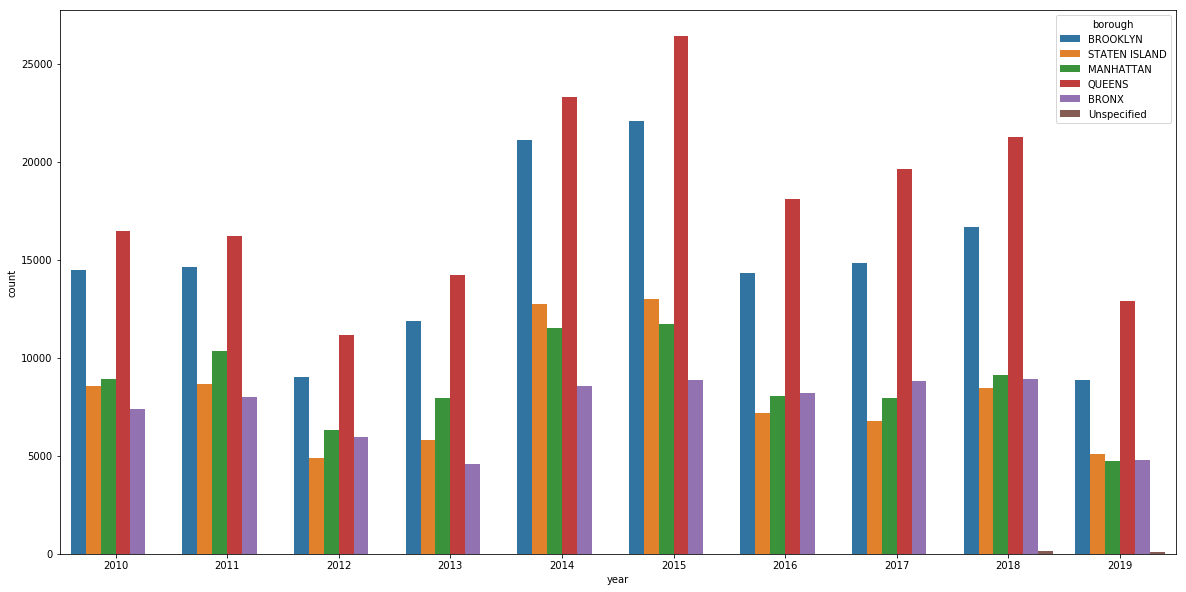

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x="year", hue="borough", data=potholes)

Fantastic, now we realize how many more potholes are reported in Brooklyn and Queens.  We did a bit of research to find out the land area of the five boroughs.  Let's just save that in an object, to find out if the number of potholes per square mile is disproportionate on a borough by borough basis.  This won't be perfect, as land area isn't an exact representation of street area (e.g. Manhattan has much more asphalt per square mile than Staten Island), but it might help.

In [19]:
land_area = pd.DataFrame.from_dict(data = {"borough" : ["BROOKLYN", 
                                                        "BRONX", 
                                                        "MANHATTAN", 
                                                        "QUEENS", 
                                                        "STATEN ISLAND"],
                                           "land_area" : [69.5, 42.47, 22.82, 108.1, 58.69]})
land_area

,borough,land_area
0,BROOKLYN,69.50
1,BRONX,42.47
2,MANHATTAN,22.82
3,QUEENS,108.10
4,STATEN ISLAND,58.69


In [20]:
potholes_per_square_mile = potholes.groupby(["borough", "year"]).size().to_frame().reset_index()
potholes_per_square_mile.columns = ["borough", "year", "number_of_pothole_complaints"]
potholes_per_square_mile = pd.merge(potholes_per_square_mile, land_area, on='borough')
potholes_per_square_mile["potholes_per_square_mile"] = potholes_per_square_mile['number_of_pothole_complaints'] / potholes_per_square_mile['land_area']
potholes_per_square_mile

,borough,year,number_of_pothole_complaints,land_area,potholes_per_square_mile
0,BRONX,2010,7398,42.47,174.193548
1,BRONX,2011,7999,42.47,188.344714
2,BRONX,2012,5954,42.47,140.193077
3,BRONX,2013,4568,42.47,107.558276
4,BRONX,2014,8549,42.47,201.295032
5,BRONX,2015,8851,42.47,208.405934
6,BRONX,2016,8178,42.47,192.559454
7,BRONX,2017,8818,42.47,207.628915
8,BRONX,2018,8923,42.47,210.101248
9,BRONX,2019,4794,42.47,112.879680


Unsurprisingly, Manhattan has a lot of pothole density -- because it has a lot of street density! Let's take a visual look at this data, now that it's scaled to "potholes per square mile".

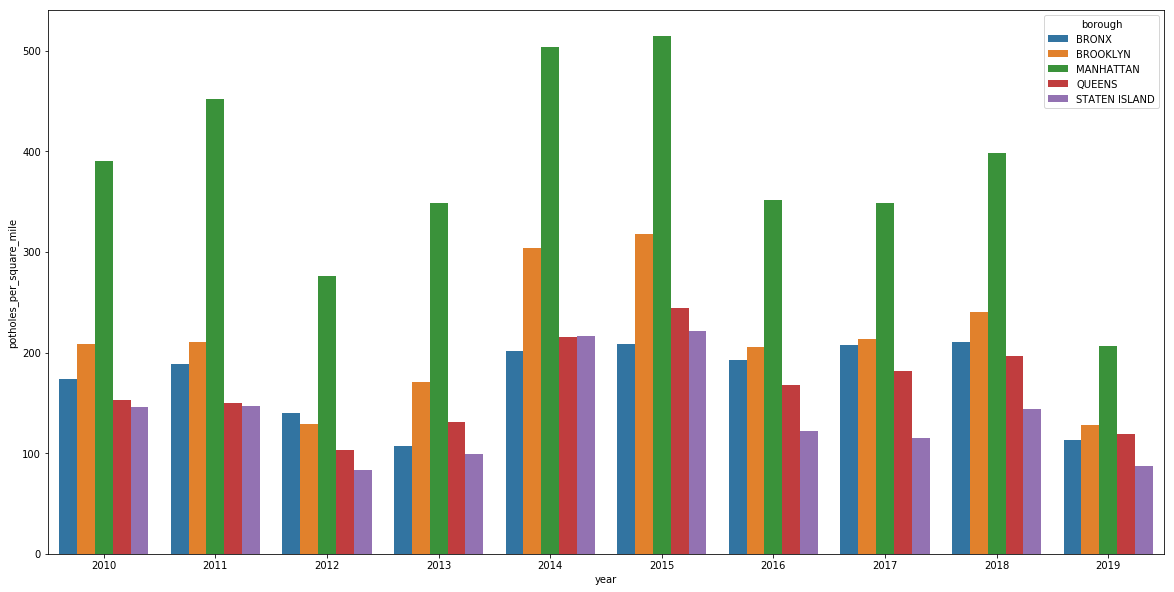

In [21]:
plt.figure(figsize=(20, 10))
sns.barplot(x="year", y="potholes_per_square_mile", hue="borough", data=potholes_per_square_mile)

We have noticed that there's something going on with the years -- it seems like pothole complaints went down in 2012 (or at least, the data wasn't recorded) and went back up in 2014-2015.  This might lead us to ask questions about data quality or if something new was added in 2015 (maybe the 311 app became available or popular?).

Let's take a look at the time to resolve complaints by year and borough.  This circles back to where we began!  We know there are tons of outliers, so we'll zoom way in on the y axis.

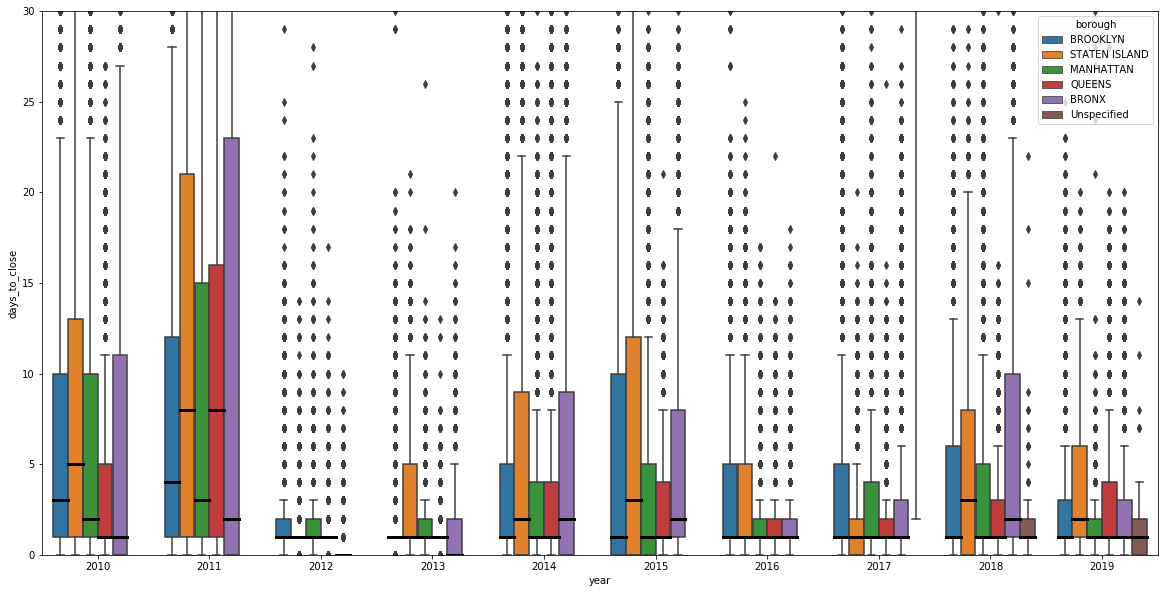

In [22]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 30)
medianprops = dict(linewidth=3, color='black')
sns.boxplot(x="year", hue="borough", y="days_to_close", data=potholes, **{'medianprops':medianprops})

Interesting!  It seems that the median value for the time it takes to resolve a complaint dropped dramatically after 2011 and has stayed down.  

Staten Island especially seems to have experienced longer resolution times than other boroughs.  That's interesting, especially given that it generally has the lowest number of complaints per square mile.

It also seems that disparities between boroughs have gotten better over time -- the medians were very different in 2010-2011, converged in 2012-2013 (when there were fewer recorded complaints), had some variation in 2014-2015, re-converged in 2016-2017, and had a bit of divergence in 2018 and 2019.  

All of this exploration and analysis brings us to some final analysis questions that we want to answer:

* Is Staten Island experiencing statistically significant longer resolution times?
* Is response time disparity per borough getting better over time?

Let's save the interim datasets we've created, in case we need them, and then move to a different script to do focused analysis on these questions.

In [23]:
land_area.to_csv("../data/land_area.csv", index=False)
potholes_per_square_mile.to_csv("../data/potholes_per_square_mile.csv", index=False)